# <center><div style="width: 370px;"> ![Panel Data](pictures/Panel_Data.jpg)

# <center> DataFrame

In the realm of data manipulation and analysis, Pandas introduces us to its heavyweight champion: the ***DataFrame***. Picture it as a 2-dimensional, labeled data structure, a dynamic canvas where each column can harbor data of different types. You can liken it to a versatile spreadsheet, an SQL table, or even a dictionary of Series objects. In essence, it's a powerhouse that's widely recognized as one of Pandas' most essential tools.

Now, here's where it gets exciting. DataFrames, much like Series, are incredibly flexible when it comes to accepting various forms of data input:

- You can construct a DataFrame from a dictionary of 1D ndarrays, lists, dictionaries, or even other Series.
- A 2-D NumPy ndarray? Sure, DataFrames can effortlessly absorb that too.
- If you're wielding a structured or record ndarray, consider it welcomed.
- And if you're feeling adventurous, you can build a DataFrame from an existing Series or even merge it with another DataFrame.

But we're not done yet. DataFrames offer more than just data. You have the option to pass index labels for rows and column labels for columns. By doing so, you're not only presenting your data but also defining the structure of your DataFrame. Imagine it as setting the stage for your data performance.

And here's the beauty of it all – if you don't explicitly provide axis labels, Pandas will cleverly construct them based on the input data, adhering to common-sense rules.

In other words, with DataFrames, you have the power to shape your data universe as you see fit. So, let's delve deeper into this dynamic data structure and uncover the boundless possibilities it offers for your data analysis journey.

> Note: When the data is a dict, and columns is not specified, the DataFrame columns will be ordered by the dict’s insertion order, if you are using Python version >= 3.6 and pandas >= 0.23.

### From dict of Series or dicts

The resulting index will be the union of the indexes of the various Series. If there are any nested dicts, these will first be converted to Series. If no columns are passed, the columns will be the ordered list of dict keys.

In [1]:
import pandas as pd
import numpy as np

In [2]:
d = {
    "column one": pd.Series([1.0, 2.0, 3.0], index=["a", "b", "c"]),
    "column two": pd.Series([1.0, 2.0, 3.0, 4.0], index=["a", "b", "c", "d"]),
}

In [3]:
df = pd.DataFrame(d)

In [4]:
df

column one  column two
a         1.0         1.0
b         2.0         2.0
c         3.0         3.0
d         NaN         4.0

In [5]:
pd.DataFrame(d, index=['d', 'b', 'a'])

column one  column two
d         NaN         4.0
b         2.0         2.0
a         1.0         1.0

In [6]:
pd.DataFrame(d, index=["d", "b", "a"], columns=["column two", "column three"])

column two column three
d         4.0          NaN
b         2.0          NaN
a         1.0          NaN

In [7]:
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [8]:
df.columns

Index(['column one', 'column two'], dtype='object')

### From dict of ndarrays / lists

The ndarrays must all be the same length. If an index is passed, it must clearly also be the same length as the arrays. If no index is passed, the result will be range(n), where n is the array length

In [9]:
d = {'one': [1, 2, 3, 4], 'two': [5, 6, 7, 8]}

In [10]:
pd.DataFrame(d)

one  two
0    1    5
1    2    6
2    3    7
3    4    8

In [11]:
pd.DataFrame(d, index=['a', 'b', 'c' , 'd'])

one  two
a    1    5
b    2    6
c    3    7
d    4    8

### From structured or record array

This case is handled identically to a dict of arrays.


In [12]:
data = np.zeros((2, ), dtype=[('A', 'i4'), ('B', 'f4'), ('C', 'a10')])

In [13]:
data[:] = [(1, 1., "test1"), (2, 2., "test2")]

In [14]:
pd.DataFrame(data)

A    B         C
0  1  1.0  b'test1'
1  2  2.0  b'test2'

In [15]:
pd.DataFrame(data, columns=["C", "B", "A"])

C    B  A
0  b'test1'  1.0  1
1  b'test2'  2.0  2

> **Note:** DataFrame is not intended to work exactly like a 2-dimensional NumPy ndarray.


### From a list of dicts

In [16]:
data = [{'a': 1, 'b': 2}, {'a': 1., 'b': 2., 'c': 3.}]

In [17]:
pd.DataFrame(data)

a    b    c
0  1.0  2.0  NaN
1  1.0  2.0  3.0

In [18]:
pd.DataFrame(data, index=['one', 'two'])

a    b    c
one  1.0  2.0  NaN
two  1.0  2.0  3.0

In [19]:
pd.DataFrame(data, columns=['a', 'b'])

a    b
0  1.0  2.0
1  1.0  2.0

### From a dict of tuples


You can automatically create a MultiIndexed frame by passing a tuples dictionary.


In [20]:
pd.DataFrame(
    {
        ("a", "b"): {("A", "B"): 1, ("A", "C"): 2},
        ("a", "a"): {("A", "C"): 3, ("A", "B"): 4},
        ("a", "c"): {("A", "B"): 5, ("A", "C"): 6},
        ("b", "a"): {("A", "C"): 7, ("A", "B"): 8},
        ("b", "b"): {("A", "D"): 9, ("A", "B"): 10},
    }
)


a              b      
       b    a    c    a     b
A B  1.0  4.0  5.0  8.0  10.0
  C  2.0  3.0  6.0  7.0   NaN
  D  NaN  NaN  NaN  NaN   9.0

### From a Series

The result will be a DataFrame with the same index as the input Series, and
with one column whose name is the original name of the Series (only if no other
column name provided).

### From a list of namedtuples

The field names of the first `namedtuple` in the list determine the columns
of the `DataFrame`. The remaining namedtuples (or tuples) are simply unpacked
and their values are fed into the rows of the `DataFrame`. If any of those
tuples is shorter than the first `namedtuple` then the later columns in the
corresponding row are marked as missing values. If any are longer than the
first `namedtuple`, a `ValueError` is raised.

In [21]:
from collections import namedtuple

In [22]:
Point = namedtuple("Point", "x y")

In [23]:
pd.DataFrame([Point(0, 0), Point(0, 3), (2, 3)])

x  y
0  0  0
1  0  3
2  2  3

In [24]:
Point3D = namedtuple("Point3D", "x y z")

In [25]:
pd.DataFrame([Point3D(0, 0, 0), Point3D(0, 3, 5), Point(2, 3)])

x  y    z
0  0  0  0.0
1  0  3  5.0
2  2  3  NaN

### From a list of dataclasses


Data Classes, can be passed into the DataFrame constructor. Passing a list of dataclasses is equivalent to passing a list of dictionaries.

Please be aware, that all values in the list should be dataclasses, mixing types in the list would result in a TypeError.

In [26]:
! pip install dataclasses

In [27]:
from dataclasses import make_dataclasspiont

ImportError: cannot import name 'make_dataclasspiont' from 'dataclasses' (/home/ali/anaconda3/envs/my_learning/lib/python3.11/dataclasses.py)

In [ ]:
Point = make_dataclass("Point", [("x", int), ("y", int)])
pd.DataFrame([Point(0, 0), Point(0, 3), Point(2, 3)])

### Alternate constructors


####  DataFrame.from_dict

DataFrame.from_dict takes a dict of dicts or a dict of array-like sequences and returns a DataFrame. It operates like the DataFrame constructor except for the orient parameter which is 'columns' by default, but which can be set to 'index' in order to use the dict keys as row labels.

In [28]:
d = {"a": [1, 2, 3], "b": [4, 5, 6]}

In [29]:
pd.DataFrame.from_dict(d)

a  b
0  1  4
1  2  5
2  3  6

In [30]:
pd.DataFrame.from_dict(dict([("A", [1, 2, 3]), ("B", [4, 5, 6])]))

A  B
0  1  4
1  2  5
2  3  6

If you pass orient=`index`, the keys will be the row labels. In this case, you can also pass the desired column names:


In [31]:
pd.DataFrame.from_dict(
    dict([("A", [1, 2, 3]), ("B", [4, 5, 6])]),
    orient='index',
    columns=['one', 'two', 'three']
)

one  two  three
A    1    2      3
B    4    5      6

#### DataFrame.from_records

DataFrame.from_records takes a list of tuples or an ndarray with structured dtype. It works analogously to the normal DataFrame constructor, except that the resulting DataFrame index may be a specific field of the structured dtype. For example:

In [32]:
data = np.zeros((2, ), dtype=[('A', 'i4'), ('B', 'f4'), ('C', 'a10')])
data[:] = [(1, 1., 'test1'), (2, 2., 'test2')]
data

array([(1, 1., b'test1'), (2, 2., b'test2')],
      dtype=[('A', '<i4'), ('B', '<f4'), ('C', 'S10')])

In [33]:
pd.DataFrame.from_records(data, index="C")

A    B
C               
b'test1'  1  1.0
b'test2'  2  2.0

### Column selection, addition, deletion


You can treat a DataFrame semantically like a dict of like-indexed Series objects. Getting, setting, and deleting columns works with the same syntax as the analogous dict operations:


In [34]:
df

column one  column two
a         1.0         1.0
b         2.0         2.0
c         3.0         3.0
d         NaN         4.0

In [35]:
df["column one"]

a    1.0
b    2.0
c    3.0
d    NaN
Name: column one, dtype: float64

In [36]:
df["column three"]= df["column two"] * df["column one"]
df["flag"] = df["column two"] > 2

In [37]:
df

column one  column two  column three   flag
a         1.0         1.0           1.0  False
b         2.0         2.0           4.0  False
c         3.0         3.0           9.0   True
d         NaN         4.0           NaN   True

Columns can be deleted or popped like with a dict:


In [38]:
del df["column one"]

In [39]:
tmn = df.pop("column three")

In [40]:
df

column two   flag
a         1.0  False
b         2.0  False
c         3.0   True
d         4.0   True

When inserting a scalar value, it will naturally be propagated to fill the column:


In [41]:
df["foo"] = "bar"
df

column two   flag  foo
a         1.0  False  bar
b         2.0  False  bar
c         3.0   True  bar
d         4.0   True  bar

When inserting a Series that does not have the same index as the DataFrame, it will be conformed to the DataFrame’s index:

In [42]:
df["test"] = df["column two"][:2]

In [43]:
df

column two   flag  foo  test
a         1.0  False  bar   1.0
b         2.0  False  bar   2.0
c         3.0   True  bar   NaN
d         4.0   True  bar   NaN

You can insert raw ndarrays but their length must match the length of the DataFrame’s index.

By default, columns get inserted at the end. The `insert` function is available to insert at a particular location in the columns:

In [44]:
df.insert(1, "bar", df["column two"])

In [45]:
df

column two  bar   flag  foo  test
a         1.0  1.0  False  bar   1.0
b         2.0  2.0  False  bar   2.0
c         3.0  3.0   True  bar   NaN
d         4.0  4.0   True  bar   NaN

In [46]:
df.insert(1, "test2", df["foo"])

In [47]:
df

column two test2  bar   flag  foo  test
a         1.0   bar  1.0  False  bar   1.0
b         2.0   bar  2.0  False  bar   2.0
c         3.0   bar  3.0   True  bar   NaN
d         4.0   bar  4.0   True  bar   NaN

In [48]:
df.insert(5, "test3", df["foo"])

In [49]:
df

column two test2  bar   flag  foo test3  test
a         1.0   bar  1.0  False  bar   bar   1.0
b         2.0   bar  2.0  False  bar   bar   2.0
c         3.0   bar  3.0   True  bar   bar   NaN
d         4.0   bar  4.0   True  bar   bar   NaN

### Assigning new columns in method chains


Inspired by dplyr’s mutate verb, DataFrame has an assign() method that allows you to easily create new columns that are potentially derived from existing columns.

In [50]:
import pandas as pd

In [51]:
iris = pd.read_csv("data/iris.csv")

In [52]:
iris.head()

SepalLength  SepalWidth  PetalLength  PetalWidth         Name
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa
3          4.6         3.1          1.5         0.2  Iris-setosa
4          5.0         3.6          1.4         0.2  Iris-setosa

In [53]:
iris.assign(sepal_ratio=iris["SepalWidth"] / iris["SepalLength"]).head()

SepalLength  SepalWidth  PetalLength  PetalWidth         Name  sepal_ratio
0          5.1         3.5          1.4         0.2  Iris-setosa     0.686275
1          4.9         3.0          1.4         0.2  Iris-setosa     0.612245
2          4.7         3.2          1.3         0.2  Iris-setosa     0.680851
3          4.6         3.1          1.5         0.2  Iris-setosa     0.673913
4          5.0         3.6          1.4         0.2  Iris-setosa     0.720000

In the example above, we inserted a precomputed value. We can also pass in a function of one argument to be evaluated on the DataFrame being assigned to

In [54]:
iris.assign(sepal_ratio=lambda x: (x["SepalWidth"] / x["SepalLength"])).head()

SepalLength  SepalWidth  PetalLength  PetalWidth         Name  sepal_ratio
0          5.1         3.5          1.4         0.2  Iris-setosa     0.686275
1          4.9         3.0          1.4         0.2  Iris-setosa     0.612245
2          4.7         3.2          1.3         0.2  Iris-setosa     0.680851
3          4.6         3.1          1.5         0.2  Iris-setosa     0.673913
4          5.0         3.6          1.4         0.2  Iris-setosa     0.720000

> **Note:** assign ***always*** returns a copy of the data, leaving the original DataFrame untouched.

Passing a callable, as opposed to an actual value to be inserted, is useful when you don’t have a reference to the DataFrame at hand. This is common when using assign in a chain of operations. For example, we can limit the DataFrame to just those observations with a Sepal Length greater than 5, calculate the ratio, and plot:

<Axes: xlabel='SepalRatio', ylabel='PetalRatio'>

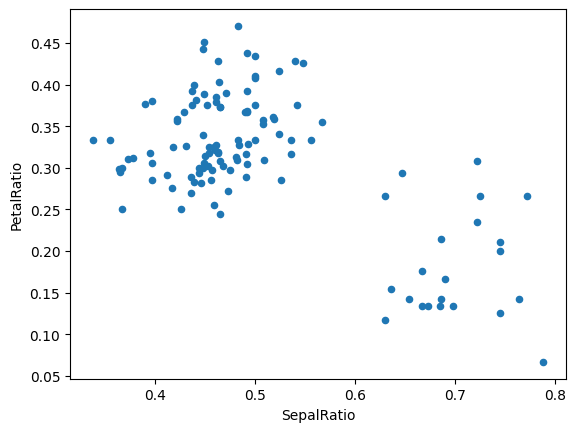

In [55]:
(
    iris.query("SepalLength > 5")
    .assign(
        SepalRatio=lambda x: x.SepalWidth / x.SepalLength,
        PetalRatio=lambda x: x.PetalWidth / x.PetalLength,
    )
    .plot(kind="scatter", x="SepalRatio", y="PetalRatio")
)

### Reindexing / selection

The basics of indexing are as follows:


|Operation|Syntax|Result|
|:--|:--|:--|
|Select column|`df[col]`|Series|
|Select row by label|`df.loc[label]`|Series|
|Select row by integer location|`df.iloc[loc]`|Series|
|Slice rows|`df[5:10]`|DataFrame|
|Select rows by boolean vector|`df[bool_vec]`|DataFrame|

Row selection, for example, returns a Series whose index is the columns of the DataFrame:

In [57]:
df = pd.DataFrame(np.random.rand(3, 4), index=['a', 'b', 'c'])

In [58]:
df

0         1         2         3
a  0.572682  0.534404  0.170009  0.805060
b  0.087357  0.121959  0.475814  0.549904
c  0.459417  0.696256  0.515334  0.364428

In [63]:
df.loc['b']

0    0.087357
1    0.121959
2    0.475814
3    0.549904
Name: b, dtype: float64

In [64]:
df.iloc[0]

0    0.572682
1    0.534404
2    0.170009
3    0.805060
Name: a, dtype: float64

> A more exhaustive treatment of sophisticated label-based indexing and

slicing, will be covered later. We will address the fundamentals of reindexing / conforming to new sets of labels.

### Data alignment and arithmetic

Data alignment between DataFrame objects automatically align on ***both the columns and the index (row labels)***. Again, the resulting object will have the union of the column and row labels

In [65]:
df = pd.DataFrame(np.random.randn(10, 4), columns=["A", "B", "C", "D"])

In [66]:
df2 = pd.DataFrame(np.random.randn(7, 3), columns=["A", "B", "C"])

In [67]:
df + df2

A         B         C   D
0  1.573494  0.248627 -1.992311 NaN
1 -0.366432  2.682053 -1.300288 NaN
2 -0.844316  0.782984 -2.732460 NaN
3 -0.532124  1.340007 -1.571623 NaN
4 -1.060477  0.794749  1.582403 NaN
5  0.707571  0.848438  1.719109 NaN
6 -1.049570  0.443245  1.003392 NaN
7       NaN       NaN       NaN NaN
8       NaN       NaN       NaN NaN
9       NaN       NaN       NaN NaN

When doing an operation between DataFrame and Series, the default behavior is to align the Series ***index*** on the DataFrame ***columns***, thus broadcasting row-wise. For example:

In [68]:
df - df.iloc[0]

A         B         C         D
0  0.000000  0.000000  0.000000  0.000000
1 -1.922578  2.236866  1.654402  0.968416
2 -1.784125  1.214888 -0.282262 -0.074384
3 -2.279214  0.546727 -0.247382  1.895971
4 -3.048195  1.259197  1.342137  0.730098
5 -0.375957  1.575212  2.413154  0.805659
6 -1.897628  0.549490  1.981235  1.475390
7 -1.654670  0.873605  1.248304  1.932203
8 -0.624909  0.701770  2.001744  1.223234
9 -0.812669 -0.918447  0.146294  1.759417

Operations with scalars are just as you would expect:

In [69]:
df * 5 + 2

A         B         C         D
0  11.994296 -2.543469 -5.613266 -3.426909
1   2.381406  8.640863  2.658746  1.415172
2   3.073670  3.530971 -7.024578 -3.798828
3   0.598228  0.190165 -6.850178  6.052948
4  -3.246679  3.752515  1.097418  0.223580
5  10.114513  5.332593  6.452503  0.601384
6   2.506156  0.203983  4.292911  3.950043
7   3.720946  1.824554  0.628255  6.234107
8   8.869751  0.965382  4.395454  2.689259
9   7.930952 -7.135703 -4.881795  5.370178

In [70]:
1 / df

A          B         C         D
0   0.500285  -1.100481 -0.656748 -0.921335
1  13.109391   0.752914  7.590176 -8.549524
2   4.656923   3.265900 -0.554043 -0.862243
3  -3.566913  -2.762683 -0.564960  1.233670
4  -0.952984   2.853043 -5.539666 -2.814650
5   0.616180   1.500333  1.122964 -3.574963
6   9.878386  -2.783938  2.180634  2.564047
7   2.905378 -28.498841 -3.644993  1.180886
8   0.727828  -4.832703  2.087287  7.254167
9   0.843035  -0.547303 -0.726555  1.483601

In [71]:
df ** 4

A          B          C         D
0  15.963526   0.681821   5.375316  1.387810
1   0.000034   3.111846   0.000301  0.000187
2   0.002126   0.008790  10.612742  1.809177
3   0.006178   0.017166   9.815852  0.431722
4   1.212434   0.015093   0.001062  0.015933
5   6.936969   0.197355   0.628835  0.006122
6   0.000105   0.016648   0.044225  0.023136
7   0.014034   0.000002   0.005665  0.514242
8   3.563559   0.001833   0.052683  0.000361
9   1.979783  11.145201   3.588616  0.206410

Boolean operators work as well:

In [72]:
df1 = pd.DataFrame({"a": [1, 0, 1], "b": [0, 1, 1]}, dtype=bool)
df2 = pd.DataFrame({"a": [0, 1, 1], "b": [1, 1, 0]}, dtype=bool)
df1 & df2

a      b
0  False  False
1  False   True
2   True  False

In [73]:
df1 | df2

a     b
0  True  True
1  True  True
2  True  True

In [74]:
df1 ^ df2

a      b
0   True   True
1   True  False
2  False   True

In [75]:
-df1


a      b
0  False   True
1   True  False
2  False  False

### Transposing

To transpose, access the `T` attribute (also the `transpose` function), similar to an ndarray:

In [76]:
df[:5].T

0         1         2         3         4
A  1.998859  0.076281  0.214734 -0.280354 -1.049336
B -0.908694  1.328173  0.306194 -0.361967  0.350503
C -1.522653  0.131749 -1.804916 -1.770036 -0.180516
D -1.085382 -0.116966 -1.159766  0.810590 -0.355284

### DataFrame interoperability with NumPy functions

Elementwise NumPy ufuncs (log, exp, sqrt, …) and various other NumPy functions can be used with no issues on Series and DataFrame, assuming the data within are numeric:

In [77]:
np.exp(df)

A         B         C         D
0  7.380632  0.403050  0.218132  0.337773
1  1.079266  3.774140  1.140822  0.889616
2  1.239532  1.358246  0.164488  0.313560
3  0.755516  0.696305  0.170327  2.249234
4  0.350170  1.419781  0.834839  0.700974
5  5.067778  1.947446  2.436349  0.755993
6  1.106532  0.698232  1.581830  1.476993
7  1.410846  0.965519  0.760067  2.332222
8  3.950927  0.813082  1.614606  1.147805
9  3.274583  0.160873  0.252496  1.962140

In [78]:
np.asarray(df)

array([[ 1.99885921, -0.90869381, -1.52265321, -1.08538171],
       [ 0.07628119,  1.32817261,  0.13174925, -0.11696557],
       [ 0.21473408,  0.30619429, -1.80491561, -1.15976568],
       [-0.28035449, -0.36196697, -1.77003561,  0.8105896 ],
       [-1.04933584,  0.35050294, -0.18051631, -0.35528396],
       [ 1.62290253,  0.6665186 ,  0.89050062, -0.27972315],
       [ 0.10123111, -0.35920334,  0.45858215,  0.39000852],
       [ 0.34418924, -0.03508915, -0.27434892,  0.84682148],
       [ 1.37395014, -0.20692353,  0.47909082,  0.13785181],
       [ 1.18619044, -1.82714063, -1.37635906,  0.6740355 ]])

DataFrame is not intended to be a drop-in replacement for ndarray as its indexing semantics and data model are quite different in places from an n-dimensional array.

`Series` implements `__array_ufunc__`, which allows it to work with NumPy’s universal functions.

The ufunc is applied to the underlying array in a Series.

In [79]:
ser = pd.Series([1, 2, 3, 4])

In [80]:
np.exp(ser)

0     2.718282
1     7.389056
2    20.085537
3    54.598150
dtype: float64

Like other parts of the library, pandas will automatically align labeled inputs as part of a ufunc with multiple inputs. For example, using `numpy.remainder()` on two `Series` with differently ordered labels will align before the operation.

In [81]:
ser1 = pd.Series([1, 2, 3], index=["a", "b", "c"])
ser2 = pd.Series([1, 3, 5], index=["b", "a", "c"])

In [82]:
ser1

a    1
b    2
c    3
dtype: int64

In [83]:
ser2

b    1
a    3
c    5
dtype: int64

In [84]:
np.remainder(ser1, ser2)

a    1
b    0
c    3
dtype: int64

As usual, the union of the two indices is taken, and non-overlapping values are filled with missing values.

In [85]:
ser3 = pd.Series([2, 4, 6], index=["b", "c", "d"])
ser3

b    2
c    4
d    6
dtype: int64

In [86]:
np.remainder(ser1, ser3)

a    NaN
b    0.0
c    3.0
d    NaN
dtype: float64

### Console display

Very large DataFrames will be truncated to display them in the console. You can also get a summary using `info()`. (Here I am reading a CSV version of the baseball dataset from the plyr R package):

In [91]:
import seaborn as sns

In [92]:
df = sns.load_dataset('titanic')

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


You can adjust the max width of the individual columns by setting `display.max_colwidth`

In [95]:
datafile = {
    "filename": ["filename_01", "filename_02"],
    "path": [
        "media/user_name/storage/folder_01/filename_01",
        "media/user_name/storage/folder_02/filename_02",
    ],
}

In [96]:
datafile

{'filename': ['filename_01', 'filename_02'],
 'path': ['media/user_name/storage/folder_01/filename_01',
  'media/user_name/storage/folder_02/filename_02']}

In [97]:
pd.set_option("display.max_colwidth", 30)


In [98]:
pd.DataFrame(datafile)


filename                           path
0  filename_01  media/user_name/storage/fo...
1  filename_02  media/user_name/storage/fo...

In [100]:
pd.set_option("display.max_colwidth", 100)

In [102]:
pd.DataFrame(datafile)

filename                                           path
0  filename_01  media/user_name/storage/folder_01/filename_01
1  filename_02  media/user_name/storage/folder_02/filename_02

You can also set this settings with:

In [109]:
pd.options.display.max_colwidth = 100

In [112]:
pd.options.display.max_columns = 3
pd.options.display.max_rows = 3

In [113]:
df

0  ...      3
0  0.044  ...  0.565
1  0.244  ...  0.575
2  0.376  ...  0.257

[3 rows x 4 columns]

Similar settings also exist for:

- `pd.options.display.max_rows`
- `pd.options.display.max_columns`
- `pd.options.display.precision`

The `precision` option sets the number of decimals to be displayed in a dataframe.

In [105]:
df = pd.DataFrame(np.random.rand(3, 4))
df

0         1         2         3
0  0.043638  0.855879  0.446952  0.565119
1  0.243974  0.966967  0.626281  0.574956
2  0.375767  0.509708  0.592004  0.257125

In [106]:
pd.options.display.precision = 3

In [107]:
df

0      1      2      3
0  0.044  0.856  0.447  0.565
1  0.244  0.967  0.626  0.575
2  0.376  0.510  0.592  0.257

### DataFrame column attribute access and IPython completion

If a DataFrame column label is a valid Python variable name, the column can be accessed like an attribute:

In [114]:
df = pd.DataFrame({"foo1": np.random.randn(5), "foo2": np.random.randn(5)})
df

foo1   foo2
0   1.341 -0.742
..    ...    ...
4  -0.906  0.907

[5 rows x 2 columns]

In [115]:
df.foo1

0    1.341
     ...  
4   -0.906
Name: foo1, Length: 5, dtype: float64